# "Coin Toss Startup – Profit or Perish"


 *Coin Toss Startup* is a **decision experiment** about risk, incentives, and “p-hacking for profit.”

Below is a complete, **ready-to-run Python game** (works in Google Colab, Jupyter, or VS Code).
The scientific message is: early stopping inflates false positives

In addition we can frame it as a *business decision*: when to “go public” with results.

---

##  “Coin Toss Startup — Profit or Perish”

###  Learning goals

Students experience how:

* **Incentives + noise** → bad inference
* **Peeking too often** → false success
* **Statistical rigor** costs short-term profit

---

###  Model

* Each “startup” flips a coin (true win prob =p_true).
* Each flip costs **1 unit** (R&D cost).
* If they “find significance” (p < α), they may **cash out**.
* If they stop early *and* it’s a false positive → **funders lose everything**.
* If the effect is real → reward = base × (1 / flip_count) (early discovery = bigger payoff).

---



---

###  What happens in class

| Parameter                            | Behavior                                                                 |
| ------------------------------------ | ------------------------------------------------------------------------ |
| `p_true = 0.5`                       | Most startups lose money, but some “get lucky” → false discovery profits |
| `p_true = 0.55`                      | True effects can be profitable but need more patience                    |
| High `peek_every` (frequent peeking) | Higher “success” rate but misleading profits                             |
| High `cost_per_flip`                 | Increases pressure to stop early                                         |
| Lower `α`                            | Reduces false profits but increases missed real effects                  |

---

### 💬 Discussion prompts

1. How often do “successful” startups actually have a real edge?
2. What happens when cost pressure (or publish-or-perish) grows?
3. How could funders change incentives to reward **replication** instead of **significance**?




In [11]:
import numpy as np

np.sum(np.random.rand(5000) < 0.25)/5000


np.float64(0.2424)

In [12]:
5 % 2
#you can define steps !!

for x in range(20):
  print(x % 10 == 0)

True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False


In [13]:
### 🐍 Python Code

# If you're in Google Colab, first run this setup cell:
!pip install ipywidgets --quiet
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

np.random.seed(42)

def simulate_startup_with_payoff(p_true=0.5, n_max=200, alpha=0.05,min_tosses=10,
                                 peek_every=5, cost_per_flip=1, base_reward=100):
    """
    Simulate one startup that may stop early when p < alpha.
    Returns profit, detection_time, and p-value trajectory.
    """
    heads = 0
    p_values = []
    detection_time = None
    profit = -cost_per_flip * n_max  # assume they run full unless success
    reward = 0

    for n in range(1, n_max + 1):
        #this is a coin flip !!! with prob pTrue !
        if np.random.rand() < p_true:
            heads += 1
        #do sth, every peek time !
        if n % peek_every == 0:
        #if n >= min_tosses and (n % peek_every == 0):
            p_hat = heads / n # observed proportion
            z = (p_hat - 0.5) / np.sqrt(0.25 / n) # test statistic !! z-score!
            p_val = 1 - stats.norm.cdf(z) # pvalue
            p_values.append((n, p_val))

            if p_val < alpha: #
                detection_time = n
                # compute profit: reward minus accumulated cost
                reward = base_reward / (n / 10)  # earlier = larger reward
                profit = reward - cost_per_flip * n
                break # terminates the for loop !!

    return profit, detection_time, p_values


def plot_startup_with_payoff(p_true=0.5, n_max=200, alpha=0.05,
                             peek_every=5, n_reps=500, cost_per_flip=1, base_reward=100):
    """
    Simulate many startups and plot typical trajectory + profit distribution.
    """
    profits, detections = [], []

    for _ in range(n_reps):
        prof, det, _ = simulate_startup_with_payoff(p_true, n_max, alpha,
                                                    peek_every, cost_per_flip, base_reward)
        profits.append(prof)
        detections.append(det is not None)

    avg_profit = np.mean(profits)
    success_rate = np.mean(detections)

    # One example trajectory
    prof_ex, det_ex, pv_ex = simulate_startup_with_payoff(p_true, n_max, alpha,
                                                          peek_every, cost_per_flip, base_reward)
    n_vals, pvals = zip(*pv_ex)
    plt.figure(figsize=(11,4))
    plt.subplot(1,2,1)
    plt.plot(n_vals, pvals, 'o-', label="Sequential p-values")
    plt.axhline(alpha, color='gray', linestyle='--', label=f'α={alpha}')
    if det_ex:
        plt.axvline(det_ex, color='green', linestyle='--', label=f'Stopped at {det_ex}')
    plt.xlabel("Number of tosses")
    plt.ylabel("p-value")
    plt.title("Typical startup trajectory")
    plt.legend()

    plt.subplot(1,2,2)
    plt.hist(profits, bins=20)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Profit distribution\nMean={avg_profit:.1f}, Success rate={success_rate:.2f}")
    plt.xlabel("Profit")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



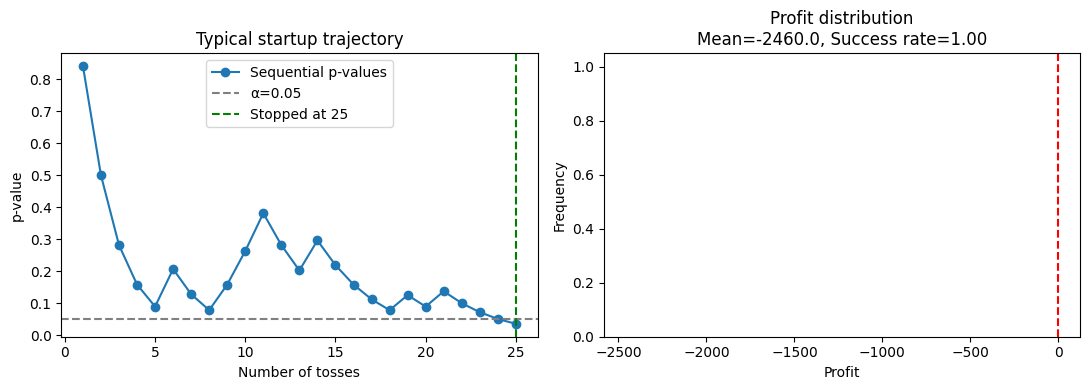

In [14]:
plot_startup_with_payoff(p_true=0.6, n_reps=1)

In [16]:
# Interactive version
interact(plot_startup_with_payoff,
         p_true=FloatSlider(value=0.5, min=0.5, max=0.7, step=0.01, description="True p"),
         n_max=IntSlider(value=200, min=50, max=1000, step=50, description="Max flips"),
         alpha=FloatSlider(value=0.05, min=0.001, max=0.2, step=0.005, description="α"),
         peek_every=IntSlider(value=5, min=1, max=20, step=1, description="Peek every"),
         n_reps=IntSlider(value=500, min=50, max=2000, step=50, description="Startups"),
         cost_per_flip=FloatSlider(value=1, min=0.1, max=5, step=0.1, description="Cost/flip"),
         base_reward=IntSlider(value=100, min=50, max=500, step=10, description="Base reward"));


interactive(children=(FloatSlider(value=0.5, description='True p', max=0.7, min=0.5, step=0.01), IntSlider(val…

## Gamified version

🔹 Null world (p_true = 0.50)


,team,mean_profit,false_positive_rate,alpha,peek_every
0,SlowButSure,-1.920000,0.050000,0.01,10
1,Conservative,-2.033333,0.036667,0.01,20
2,Balanced,-3.460000,0.108667,0.02,5
3,Aggressive,-6.023000,0.312667,0.05,1



🔹 Weak effect world (p_true = 0.55)


,team,mean_profit,success_rate,mean_detection_time,alpha,peek_every
0,Aggressive,58.230190,0.707333,53.661640,0.05,1
1,Balanced,-37.327093,0.428667,87.006221,0.02,5
2,SlowButSure,-67.317897,0.306667,107.934783,0.01,10
3,Conservative,-73.745682,0.278667,110.765550,0.01,20



🔹 Stron effect world (p_true = 0.65)


,team,mean_profit,success_rate,mean_detection_time,alpha,peek_every
0,Aggressive,175.384100,1.000000,28.940667,0.05,1
1,Balanced,113.193045,0.996000,48.514056,0.02,5
2,SlowButSure,64.628044,0.987333,67.434166,0.01,10
3,Conservative,40.016000,0.985333,77.280108,0.01,20


/Users/robertgreene/VS_CODE/Python/BIPM_WS25/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


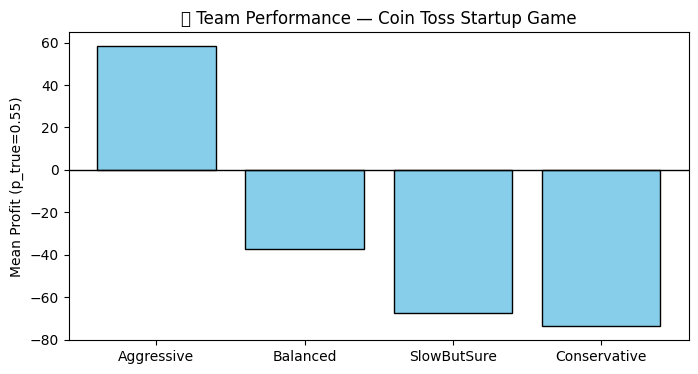

In [6]:
# ================================
# 🪙 COIN TOSS STARTUP GAME
# ================================
# Copy this cell into Google Colab and run all
# Author: adapted for teaching from ChatGPT (GPT-5)
# -------------------------------

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)

# ========== SIMULATION CORE ==========

def simulate_startup_with_payoff(p_true=0.5, n_max=200, alpha=0.05,
                                 peek_every=5, min_tosses=10,
                                 cost_per_flip=1.0, base_reward=300.0,
                                 reward_decay_lambda=0.03, rng=None):
    """Simulate one startup run with a peeking testing rule."""
    if rng is None:
        rng = np.random.default_rng()
    heads = 0
    detection_time = None

    for n in range(1, n_max + 1):
        if rng.random() < p_true:
            heads += 1

        if n >= min_tosses and (n % peek_every == 0):
            p_hat = heads / n
            denom = np.sqrt(max(1e-9, 0.25 / n))
            z = (p_hat - 0.5) / denom
            p_val = 1 - stats.norm.cdf(z)
            if p_val < alpha:
                detection_time = n
                break

    total_cost = cost_per_flip * (detection_time if detection_time is not None else n_max)

    if detection_time is not None:
        if p_true > 0.5:
            reward = base_reward * np.exp(-reward_decay_lambda * detection_time)
            profit = reward - total_cost
            false_positive = False
            success = True
        else:
            profit = -total_cost
            false_positive = True
            success = False
    else:
        profit = -cost_per_flip * n_max if p_true > 0.5 else 0.0
        false_positive = False
        success = False

    return {'profit': profit,
            'detection_time': detection_time,
            'success': success,
            'false_positive': false_positive}


def evaluate_team_strategy(strategy, p_true=0.5, n_reps=1000, n_max=200, rng=None):
    """Monte Carlo evaluation of one team."""
    if rng is None:
        rng = np.random.default_rng()

    profits, successes, false_pos, det_times = [], 0, 0, []

    for _ in range(n_reps):
        res = simulate_startup_with_payoff(p_true=p_true, n_max=n_max, rng=rng, **strategy)
        profits.append(res['profit'])
        if res['success']: successes += 1; det_times.append(res['detection_time'])
        if res['false_positive']: false_pos += 1

    return {
        'mean_profit': np.mean(profits),
        'median_profit': np.median(profits),
        'success_rate': successes / n_reps,
        'false_positive_rate': false_pos / n_reps,
        'mean_detection_time': np.mean(det_times) if det_times else np.nan
    }


def run_tournament(teams, p_true=0.5, n_reps=1000, n_max=200, rng_seed=123):
    """Evaluate multiple teams and return leaderboard."""
    rng = np.random.default_rng(rng_seed)
    rows = []
    for name, strat in teams.items():
        stats_ = evaluate_team_strategy(strat, p_true=p_true, n_reps=n_reps, n_max=n_max, rng=rng)
        rows.append({'team': name, **stats_, **strat})
    df = pd.DataFrame(rows).sort_values('mean_profit', ascending=False).reset_index(drop=True)
    return df

# ========== DEFINE TEAMS HERE ==========

teams = {
    # Teams pick their peek_every, alpha, and min_tosses
    'Conservative': {'peek_every':20, 'alpha':0.01, 'min_tosses':30,
                     'cost_per_flip':1.0, 'base_reward':120.0, 'reward_decay_lambda':0.02},
    'Aggressive': {'peek_every':1, 'alpha':0.05, 'min_tosses':5,
                   'cost_per_flip':1.0, 'base_reward':120.0, 'reward_decay_lambda':0.02},
    'Balanced': {'peek_every':5, 'alpha':0.02, 'min_tosses':10,
                 'cost_per_flip':1.0, 'base_reward':120.0, 'reward_decay_lambda':0.02},
    'SlowButSure': {'peek_every':10, 'alpha':0.01, 'min_tosses':20,
                    'cost_per_flip':1.0, 'base_reward':120.0, 'reward_decay_lambda':0.02},
}

teams = {
    'Conservative': {'peek_every':20, 'alpha':0.01, 'min_tosses':30,
                     'cost_per_flip':0.5, 'base_reward':300.0, 'reward_decay_lambda':0.02},
    'Aggressive': {'peek_every':1, 'alpha':0.05, 'min_tosses':5,
                   'cost_per_flip':0.5, 'base_reward':300.0, 'reward_decay_lambda':0.02},
    'Balanced': {'peek_every':5, 'alpha':0.02, 'min_tosses':10,
                 'cost_per_flip':0.5, 'base_reward':300.0, 'reward_decay_lambda':0.02},
    'SlowButSure': {'peek_every':10, 'alpha':0.01, 'min_tosses':20,
                    'cost_per_flip':0.5, 'base_reward':300.0, 'reward_decay_lambda':0.02},
}


# ========== RUN TOURNAMENTS ==========

n_reps = 1500
n_max = 200

print("🔹 Null world (p_true = 0.50)")
leader_null = run_tournament(teams, p_true=0.5, n_reps=n_reps, n_max=n_max)
display(leader_null[['team', 'mean_profit', 'false_positive_rate', 'alpha', 'peek_every']])

print("\n🔹 Weak effect world (p_true = 0.55)")
leader_eff = run_tournament(teams, p_true=0.55, n_reps=n_reps, n_max=n_max)
display(leader_eff[['team', 'mean_profit', 'success_rate', 'mean_detection_time', 'alpha', 'peek_every']])

print("\n🔹 Stron effect world (p_true = 0.65)")
leader_strong = run_tournament(teams, p_true=0.65, n_reps=n_reps, n_max=n_max)
display(leader_strong[['team', 'mean_profit', 'success_rate', 'mean_detection_time', 'alpha', 'peek_every']])

# ========== VISUALIZATION ==========

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(leader_eff['team'], leader_eff['mean_profit'], color='skyblue', edgecolor='black')
ax.axhline(0, color='k', lw=1)
ax.set_ylabel("Mean Profit (p_true=0.55)")
ax.set_title("🏆 Team Performance — Coin Toss Startup Game")
plt.show()


In [7]:
leader_null

print("\n🔹 Strong effect world (p_true = 0.65)")
leader_strong = run_tournament(teams, p_true=0.65, n_reps=n_reps, n_max=n_max)
display(leader_strong[['team', 'mean_profit', 'success_rate', 'mean_detection_time', 'alpha', 'peek_every']])



🔹 Strong effect world (p_true = 0.65)


,team,mean_profit,success_rate,mean_detection_time,alpha,peek_every
0,Aggressive,175.384100,1.000000,28.940667,0.05,1
1,Balanced,113.193045,0.996000,48.514056,0.02,5
2,SlowButSure,64.628044,0.987333,67.434166,0.01,10
3,Conservative,40.016000,0.985333,77.280108,0.01,20


,team,mean_profit_overall,min_profit,max_profit,avg_success_rate,avg_false_pos
0,Aggressive,56.015828,-6.232500,119.761772,0.544333,0.102333
1,Balanced,5.162698,-28.380427,47.123520,0.450667,0.037333
2,SlowButSure,-24.553330,-71.972387,-0.252603,0.357333,0.011667
3,Conservative,-30.629220,-72.797392,-1.910000,0.349667,0.012667


/Users/robertgreene/VS_CODE/Python/BIPM_WS25/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


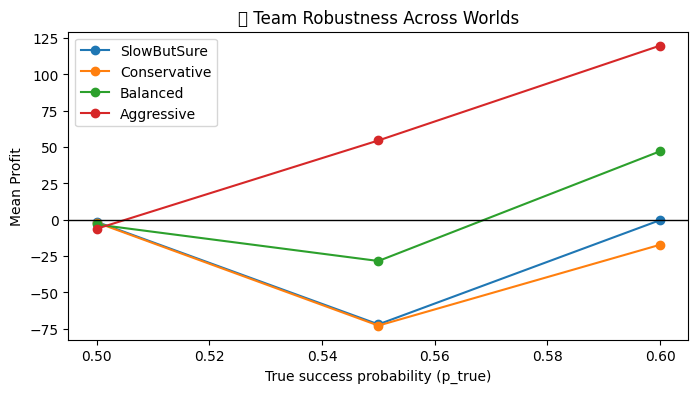

In [8]:
# ================================
# 🔹 MULTI-WORLD TOURNAMENT LEADERBOARD
# ================================

p_values = [0.50, 0.55, 0.60]
results = []

for p in p_values:
    df = run_tournament(teams, p_true=p, n_reps=1000, n_max=200)
    df['p_true'] = p
    results.append(df)

# Combine
df_all = pd.concat(results, ignore_index=True)

# --- Aggregate performance across worlds ---
summary = (
    df_all.groupby('team')
    .agg(mean_profit_overall=('mean_profit', 'mean'),
         min_profit=('mean_profit', 'min'),
         max_profit=('mean_profit', 'max'),
         avg_success_rate=('success_rate', 'mean'),
         avg_false_pos=('false_positive_rate', 'mean'))
    .sort_values('mean_profit_overall', ascending=False)
    .reset_index()
)

display(summary)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8,4))
for team in df_all['team'].unique():
    subset = df_all[df_all['team'] == team]
    ax.plot(subset['p_true'], subset['mean_profit'], marker='o', label=team)

ax.set_xlabel("True success probability (p_true)")
ax.set_ylabel("Mean Profit")
ax.set_title("📈 Team Robustness Across Worlds")
ax.axhline(0, color='k', lw=1)
ax.legend()
plt.show()
